In [27]:
import numpy as np # scientific computation
import pandas as pd # Loading dataset file
import matplotlib.pyplot as plt # Visualization
import nltk # Preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle


In [28]:
#Load our dataset
df = pd.read_csv("spam_ham_dataset.csv")

In [29]:
#top 5 rows of the dataframes
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [30]:
#Bottom 5 rows of the dataframes
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [31]:
# Drop the column'Unnamed: 0' 
df = df.drop("Unnamed: 0", axis=1)

In [33]:
# Return the shape of the data 
df.shape

(5171, 3)

In [38]:
# Return the number of dimensions
df.ndim

2

In [40]:
# Return the size of the data
df.size

15513

In [42]:
# Returns the sum of all NA values 
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [45]:
#Give concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [47]:
df.describe() #return important values for continous column data

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [48]:
#It will return true if any column having null value
df.isnull().any()

label        False
text         False
label_num    False
dtype: bool

In [49]:
#Find null value
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

([<matplotlib.axis.XTick at 0x1d6a00841a0>,
 [Text(0, 0, 'Non spam'), Text(1, 0, 'spam')])

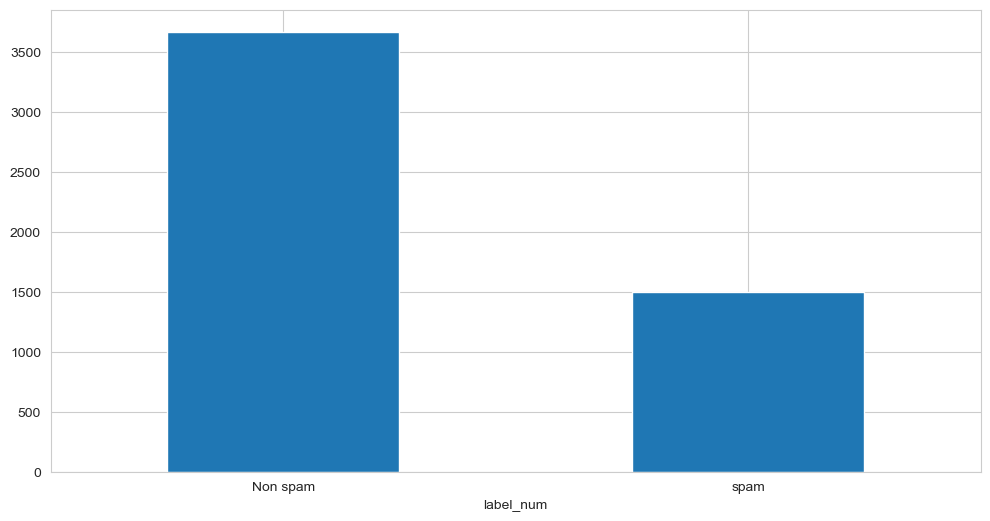

In [50]:
# Plotting the value counts of 'label_num' column as a bar chart 
df["label_num"].value_counts().plot(kind="bar", figsize=(12, 6)) 
plt.xticks(np.arange(2), ('Non spam', 'spam'), rotation=0) 


In [51]:
import re
corpus = []
length = len(df)

In [52]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riya1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
for i in range(0, length):
    text = re.sub("[^a-zA-Z0-9]", " ", df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)

In [59]:
corpus

['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [61]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [62]:
import pickle  ## Importing pickle for dumping models
pickle.dump(cv, open('cv-transform.pkl', 'wb'))  ## Saving into cv-transform.pkl file

In [63]:
# Splitting data into train and validation sets using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [64]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [66]:
# Fitting the model to the training sets
model.fit(X_train, y_train)

MultinomialNB()

In [67]:
# Predict the values
y_pred = model.predict(X_test)
# Convert predictions from boolean to integer (if needed)
y_pred = y_pred.astype(int)
# Print the predictions
y_pred


array([0, 0, 0, ..., 0, 1, 0])

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Calculate the accuracy score
score = accuracy_score(y_test, y_pred)
# Print the confusion matrix and accuracy score
print(cm)
print('Accuracy Score Is:-', score * 100)

[[716  16]
 [ 17 286]]
Accuracy Score Is:- 96.81159420289856


In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000)  # Adjust the number of components as needed
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

svm_reduced = SVC(kernel='rbf')
svm_reduced.fit(X_train_reduced, y_train)


SVC()

In [71]:
# Prediction
y_pred4 = svm_reduced.predict(X_test_reduced)
# Calculate accuracy
from sklearn.metrics import accuracy_score
svm_rbf = accuracy_score(y_test, y_pred4)
print(svm_rbf)  

0.9642512077294686


In [72]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
# Prediction
y_pred5 = svm_linear.predict(X_test)
# Calculate accuracy
svm_sig = accuracy_score(y_test, y_pred5)
print(svm_sig) 

0.9681159420289855


In [74]:
# Create Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
# Prediction
y_pred6 = dt.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
dec_tree = accuracy_score(y_test, y_pred6)
dec_tree

0.9429951690821256

In [76]:
# Create a DataFrame to compare model performances
models = pd.DataFrame({
    'Model': ['MultinomialNB', 'SVM', 'SVM-linear', 'Decision Tree'],
    'Test Score': [score, svm_rbf, svm_sig, dec_tree]
})
# Sort the models by their test score in descending order
models = models.sort_values(by='Test Score', ascending=False)
models

,Model,Test Score
0,MultinomialNB,0.968116
2,SVM-linear,0.968116
1,SVM,0.964251
3,Decision Tree,0.942995


In [77]:
import pickle
pickle.dump(model , open ("spam-sms-mnb-model.pkl" , "wb"))

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
count    5171.000000
mean        3.289886
std         0.453753
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: message_length, dtype: float64
count    5171.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: word_count, dtype: float64


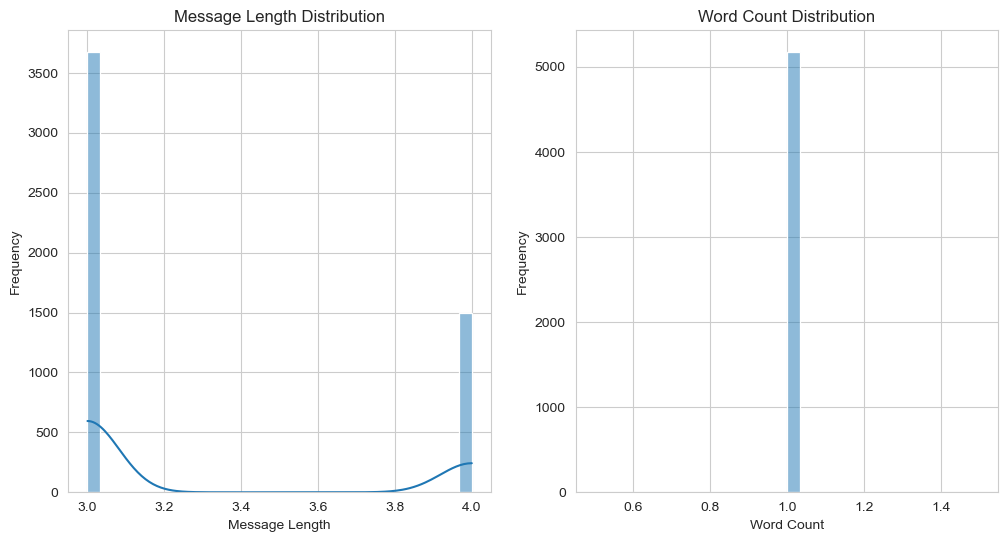

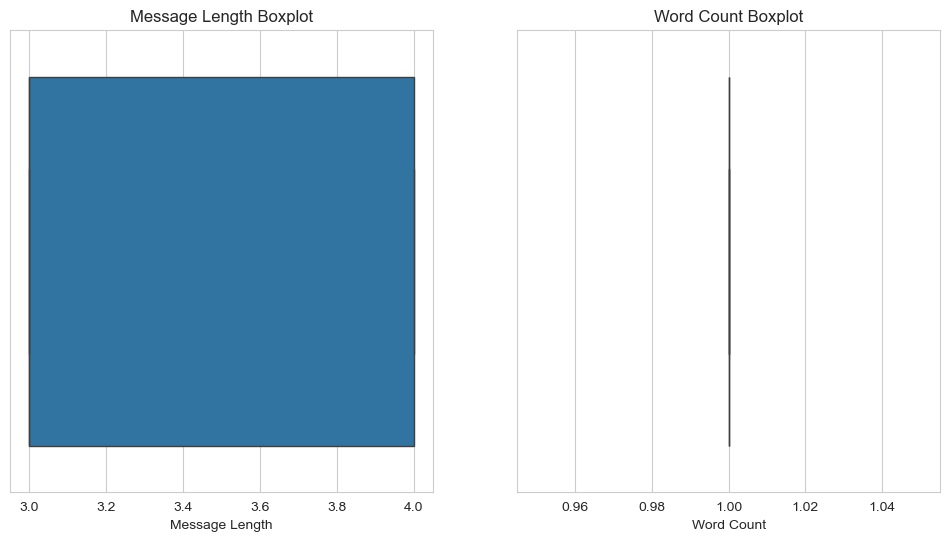

In [78]:
#univariate analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spam_ham_dataset.csv', encoding='latin-1')

# Check the number of columns and print the first few rows to understand the structure
print(df.head())  # This will help you see how many columns there are

# Assuming the dataset has more than two columns, we can select the first two columns
df = df.iloc[:, :2]  # Select only the first two columns

# Rename the columns
df.columns = ['label', 'text']

# Feature engineering
df['message_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Summary statistics
print(df['message_length'].describe())
print(df['word_count'].describe())

# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['message_length'], bins=30, kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.show()

# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['message_length'])
plt.title('Message Length Boxplot')
plt.xlabel('Message Length')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['word_count'])
plt.title('Word Count Boxplot')
plt.xlabel('Word Count')

plt.show()

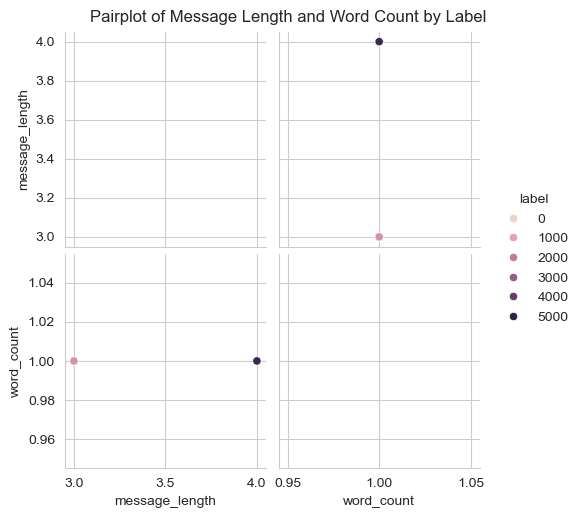

                message_length  word_count
message_length             1.0         NaN
word_count                 NaN         NaN


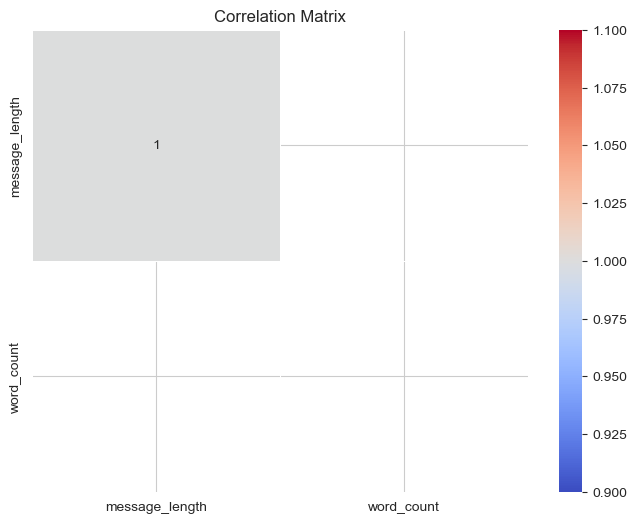

In [79]:
#multi Variate analysis
# Pairplot to visualize relationships between multiple variables
sns.pairplot(df, hue='label', vars=['message_length', 'word_count'])
plt.suptitle('Pairplot of Message Length and Word Count by Label', y=1.02)
plt.show()

# Correlation matrix to understand relationships
correlation_matrix = df[['message_length', 'word_count']].corr()
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


C:\Users\riya1\AppData\Local\Temp\ipykernel_9088\1811277573.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=data, palette='Set2')


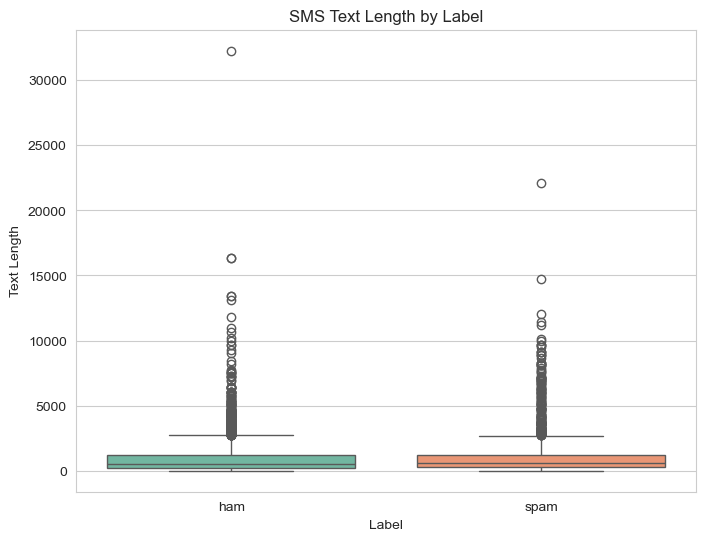

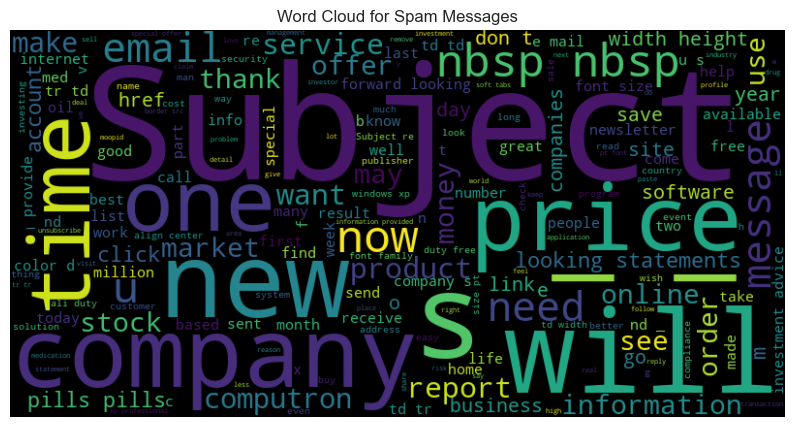

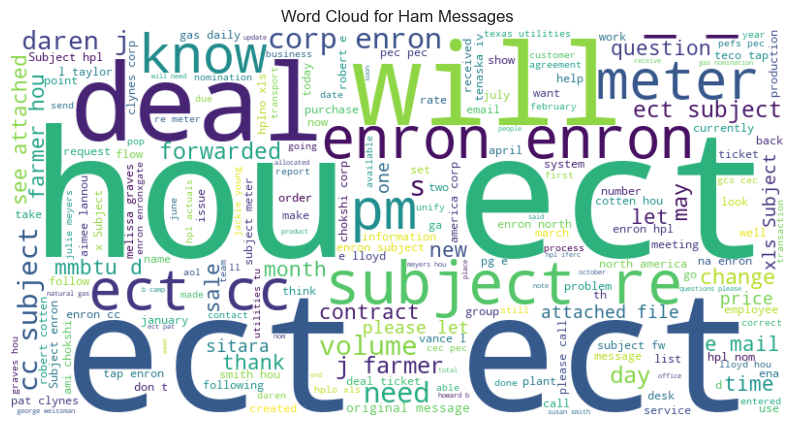

In [80]:
#Bi variate analysis
# Word frequency analysis
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the data from a CSV file
# Make sure to replace 'sms_data.csv' with the path to your actual data file
data = pd.read_csv('spam_ham_dataset.csv')

# Ensure the DataFrame has the expected columns: 'label' and 'text'
# Example structure:
# data = pd.DataFrame({
#     'label': ['ham', 'spam', 'ham', 'spam'],
#     'text': ['Hello, how are you?', 'Win a million dollars!', 'See you tomorrow!', 'Limited time offer!']
# })
data['text_length'] = data['text'].apply(len)  # Create a new column for text length
# Text length grouped by label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=data, palette='Set2')
plt.title("SMS Text Length by Label")
plt.xlabel("Label")
plt.ylabel("Text Length")
plt.show()

# Word frequency analysis for Spam Messages
spam_words = ' '.join(data[data['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Spam Messages")
plt.axis('off')
plt.show()

# Word frequency analysis for Ham Messages
ham_words = ' '.join(data[data['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Ham Messages")
plt.axis('off')
plt.show()



In [81]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('spam_ham_dataset.csv')

# Display dimensions
print("Dimension:")
print(f"{df.shape[0]} rows × {df.shape[1]} columns\n")

# Use the Styler to add color to descriptive statistics
styled_stats = (
    df.describe()
    .style.set_properties(**{'border-color': 'black', 'border-width': '2px', 'border-style': 'solid'})
)

# Display the styled table
styled_stats


Dimension:
5171 rows × 4 columns



,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


C:\Users\riya1\AppData\Local\Temp\ipykernel_9088\3630193692.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)
C:\Users\riya1\AppData\Local\Temp\ipykernel_9088\3630193692.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)
C:\Users\riya1\AppData\Local\Temp\ipykernel_9088\3630193692.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)


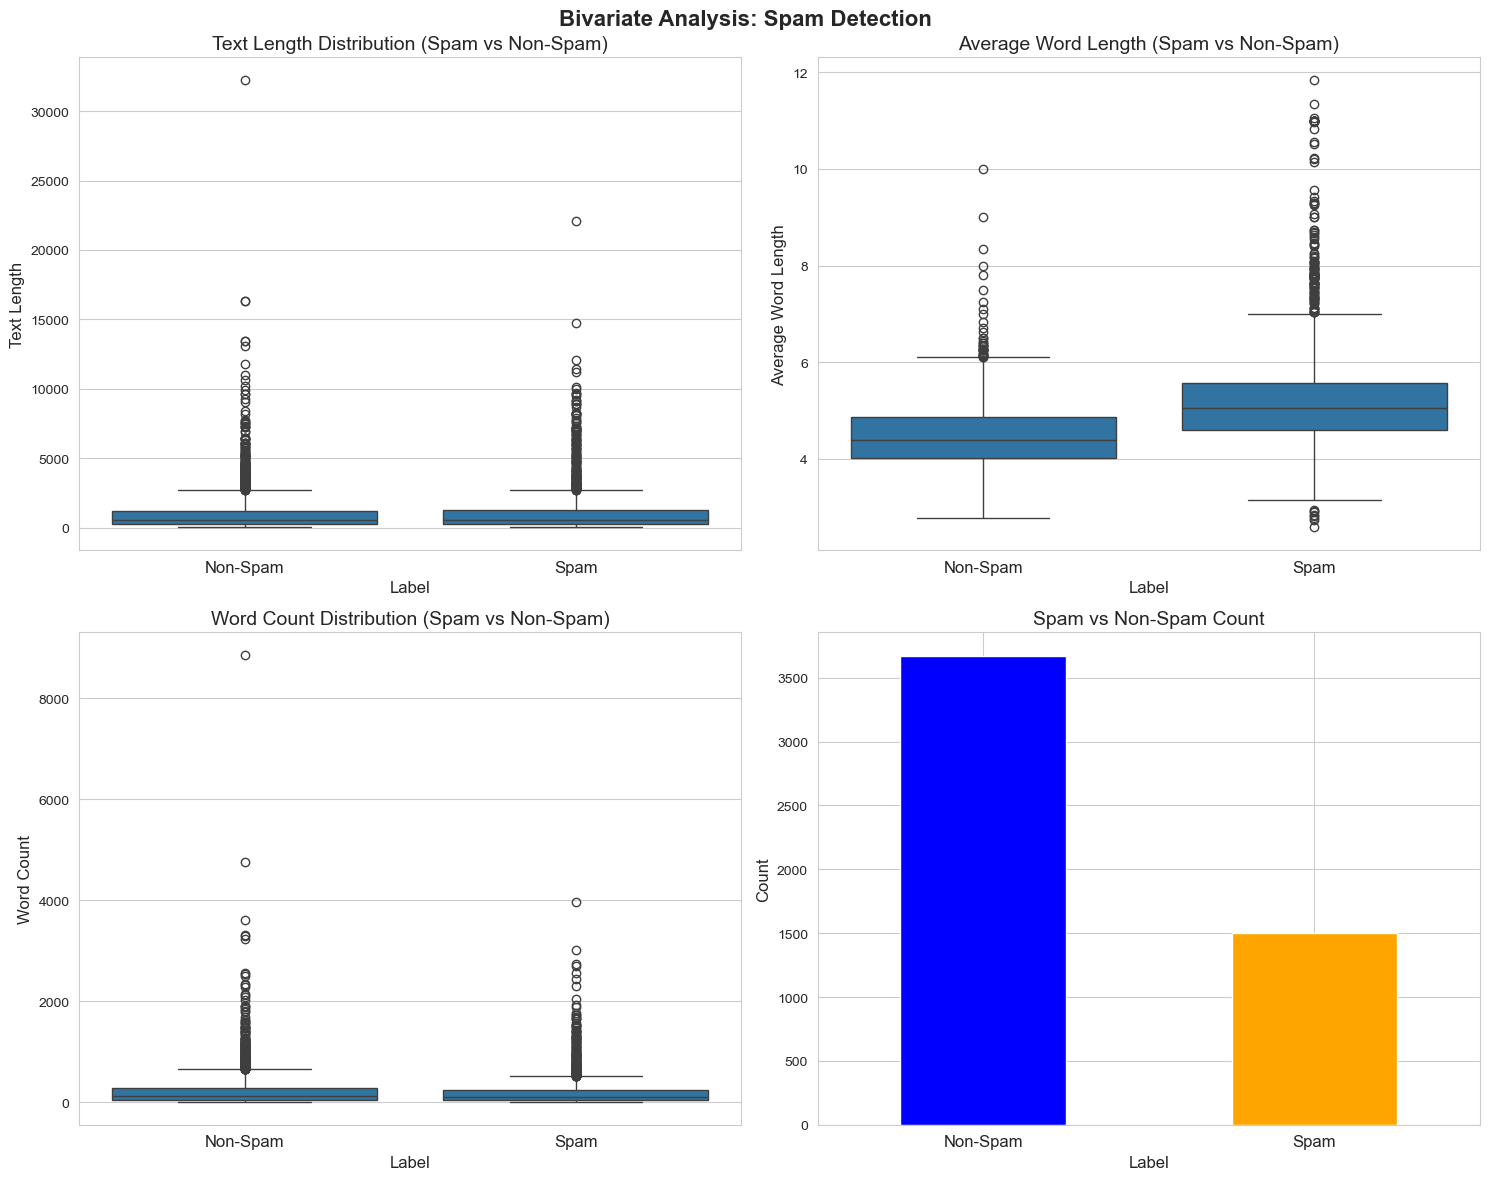

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add features for bivariate analysis
df['text_length'] = df['text'].apply(len)  # Length of each text
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Word count in each text
df['avg_word_length'] = df['text_length'] / df['word_count']  # Average word length

# Create a 2x2 subplot grid for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4)

# Plot 1: Distribution of text lengths by Spam vs Non-Spam
sns.boxplot(data=df, x='label_num', y='text_length', ax=axes[0, 0])
axes[0, 0].set_title('Text Length Distribution (Spam vs Non-Spam)', fontsize=14)
axes[0, 0].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)
axes[0, 0].set_xlabel('Label', fontsize=12)
axes[0, 0].set_ylabel('Text Length', fontsize=12)

# Plot 2: Average word length distribution by Spam vs Non-Spam
sns.boxplot(data=df, x='label_num', y='avg_word_length', ax=axes[0, 1])
axes[0, 1].set_title('Average Word Length (Spam vs Non-Spam)', fontsize=14)
axes[0, 1].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)
axes[0, 1].set_xlabel('Label', fontsize=12)
axes[0, 1].set_ylabel('Average Word Length', fontsize=12)

# Plot 3: Word count distribution by Spam vs Non-Spam
sns.boxplot(data=df, x='label_num', y='word_count', ax=axes[1, 0])
axes[1, 0].set_title('Word Count Distribution (Spam vs Non-Spam)', fontsize=14)
axes[1, 0].set_xticklabels(['Non-Spam', 'Spam'], fontsize=12)
axes[1, 0].set_xlabel('Label', fontsize=12)
axes[1, 0].set_ylabel('Word Count', fontsize=12)

# Plot 4: Bar plot of Spam vs Non-Spam counts
df['label_num'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['blue', 'orange'])
axes[1, 1].set_title('Spam vs Non-Spam Count', fontsize=14)
axes[1, 1].set_xticklabels(['Non-Spam', 'Spam'], rotation=0, fontsize=12)
axes[1, 1].set_xlabel('Label', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Add a centered title for all plots
fig.suptitle('Bivariate Analysis: Spam Detection', fontsize=16, weight='bold')

# Show plots
plt.tight_layout()
plt.show()


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=35000)
X = tfidf.fit_transform(corpus).toarray()

In [110]:
from sklearn.metrics import classification_report

# Generate a classification report for each model
print("Classification Report for MultinomialNB:")
print(classification_report(y_test, y_pred))

print("Classification Report for SVM-RBF:")
print(classification_report(y_test, y_pred4))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred6))


Classification Report for MultinomialNB:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       732
        True       0.95      0.94      0.95       303

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Classification Report for SVM-RBF:
              precision    recall  f1-score   support

       False       0.99      0.95      0.97       732
        True       0.90      0.99      0.94       303

    accuracy                           0.96      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.96      0.96      1035

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       732
        True       0.90      0.90      0.90       303

    accuracy                           0.94      1035
   macro av

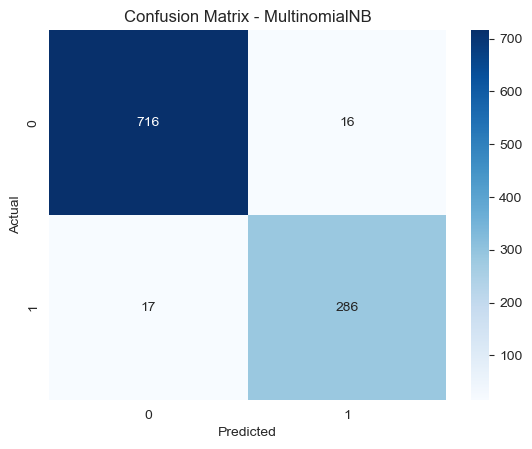

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Naive Bayes
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MultinomialNB")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [114]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [3.61517537e-01 7.68305650e-02 3.09831542e-02 ... 5.72627535e-06
 5.71310897e-06 5.69395306e-06]


In [116]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=35000)),
    ('classifier', MultinomialNB())
])

pipeline.fit(df['text'], y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=35000)),
                ('classifier', MultinomialNB())])

In [120]:
# Feature Engineering: Text Preprocessing and Feature Extraction

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords if necessary
nltk.download('stopwords')

# Initialize variables
corpus = []  # List to store preprocessed text
pe = PorterStemmer()  # Initialize stemmer
stopword = stopwords.words("english")  # List of stopwords

# Loop through all rows in the dataset for text preprocessing
for i in range(len(df)):
    # Remove non-alphanumeric characters
    text = re.sub("[^a-zA-Z0-9]", " ", df["text"][i])
    
    # Convert text to lowercase
    text = text.lower()
    
    # Split the text into words
    text = text.split()
    
    # Apply stemming and remove stopwords
    text = [pe.stem(word) for word in text if word not in set(stopword)]
    
    # Join the words back into a single string
    text = " ".join(text)
    
    # Append the processed text to the corpus
    corpus.append(text)

# Convert the preprocessed text data into numerical features using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=35000)  # Limit to top 35000 features
X = tfidf.fit_transform(corpus).toarray()  # Transform the corpus into a feature matrix

# Extract dependent variable (target labels) from the dataset
y = pd.get_dummies(df['label'])['spam'].values  # Convert 'spam' and 'ham' labels to binary values



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riya1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
